In [ ]:
import os
import sys
import cv2
import numpy as np
from os import listdir
from imutils import paths
from os.path import isfile, join
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPool2D
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
np.random.seed(1337)  # for reproducibility
import tensorflow
print(tensorflow.__version__)

2.3.0


In [ ]:
!git clone # for git cloning

Cloning into 'fyp-deep-learning-eeg'...
remote: Enumerating objects: 798, done.
remote: Counting objects: 100% (798/798), done.
remote: Compressing objects: 100% (793/793), done.
remote: Total 7091 (delta 8), reused 793 (delta 5), pack-reused 6293
Receiving objects: 100% (7091/7091), 217.40 MiB | 17.57 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Checking out files: 100% (7722/7722), done.


In [ ]:
sys.path.append('fyp-deep-learning-eeg')
import preprocess2
preprocess2.test_module()

Module is connected!


In [ ]:
preprocess2.get_folder_list('CN2')

['fyp-deep-learning-eeg/FYP 2/output/CN2/c3_LH/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c1_RN/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c1_RH/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c4_LH/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c2_RH/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c1_LN/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c5_LN/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c4_RH/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c5_LH/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c2_LH/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c3_RH/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c1_LH/',
 'fyp-deep-learning-eeg/FYP 2/output/CN2/c5_RH/']

In [ ]:
folder_list= ['CN2', 'DS2']
X, y = preprocess2.prep_total_pipeline(folder_list)
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)
# check what percentage is optimal

Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
X shape: (1664, 480, 540, 3) -=-=-=-= y shape: (1664,)
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
All images being used
Num pics in folder: 128
A

In [ ]:
X.shape

(3328, 480, 540, 3)

In [ ]:
X.dtype

dtype('uint8')

In [ ]:
batch_size = 50
num_classes = len(folder_list)
num_epochs = 10
nb_filters = 32 # number of convolutional filters to use
pool_size = (2, 2) # size of pooling area for max pooling
                   # decreases image size, and helps to avoid overfitting
img_rows = 480
img_cols = 540

if K.image_data_format() == 'th':
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[3], img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[3], img_rows, img_cols)
  X_val = X_val.reshape(X_val.shape[0], X_val.shape[3], img_rows, img_cols)
  input_shape = (X_test.shape[3], img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, X_train.shape[3])
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, X_test.shape[3])
  X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, X_val.shape[3])
  input_shape = (img_rows, img_cols, X_test.shape[3])

# don't change conversion or normalization
X_train = X_train.astype('float32') # data was uint8 [0-255]
X_test = X_test.astype('float32')  # data was uint8 [0-255]
X_val = X_val.astype('float32')  # data was uint8 [0-255]
X_train /= 255 # normalizing (scaling from 0 to 1)
X_test /= 255  # normalizing (scaling from 0 to 1)
X_val /= 255  # normalizing (scaling from 0 to 1)
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_val.shape[0], 'validate samples')

X_train shape: (2662, 480, 540, 3)
2662 train samples
333 test samples
333 validate samples


In [ ]:
# convert class vectors to binary class matrices (don't change)
Y_train = np_utils.to_categorical(y_train, num_classes) # cool
Y_test = np_utils.to_categorical(y_test, num_classes)   # cool * 2
Y_val = np_utils.to_categorical(y_val, num_classes)   # cool * 2

In [ ]:
y_train2 = []
for x in y_train:
    y_train2.append(int(x))
y_test2 = []
for y in y_test:
    y_test2.append(int(y))
y_val2 = []
for z in y_val:
    y_val2.append(int(z))

In [ ]:
#K.clear_session()
model = Sequential()

#model.add(Convolution2D(nb_filters, (5, 5), strides=(1, 1), padding='same', input_shape=input_shape))
model.add(Convolution2D(nb_filters, (5, 5), activation = 'relu', padding='same', input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(nb_filters, (5, 5), activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(rate=0.25))
#model.add(Convolution2D(nb_filters, (3, 3)))
#model.add(Activation('relu'))

#model.add(Activation('tanh'))
model.add(Convolution2D(nb_filters*2, (3, 3), activation='relu', padding='same'))

model.add(Convolution2D(nb_filters*2, (3, 3), activation='relu', padding='same'))

model.add(Convolution2D(nb_filters*2, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(rate=0.25))

model.add(Convolution2D(nb_filters*2, (3, 3), activation='relu', padding='same'))

model.add(Convolution2D(nb_filters*2, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))

#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dropout(0.15))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

# during fit process watch train and test error simultaneously
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_data=(X_val, y_val))

print('////////////////////////////////////////////////////////////////////////////////////////////')

score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # this is the one we care about






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2662 samples, validate on 333 samples
Epoch 1/10





2662/2662 [==============================] - 65s 25ms/step - loss: 0.7519 - binary_accuracy: 0.5316 - val_loss: 0.6331 - val_binary_accuracy: 0.6486
Epoch 2/10
2662/2662 [==============================] - 46s 17ms/step - loss: 0.5147 - binary_accuracy: 0.7393 - val_loss: 0.4761 - val_binary_accuracy: 0.7718
Epoch 3/10
2662/2662 [==============================] - 46s 17ms/step - loss: 0.4191 - binary_accuracy: 0.8114 - val_loss: 0.4029 - val_binary_accuracy: 0.8198
Epoch 4/10
2662/2662 [==============================] - 46s 17ms/step - loss: 0.3262 - binary_accuracy: 0.8576 - val_loss: 0.3866 - val_binary_accuracy: 0.8438
Epoch 5/10
2662/2662 [==============================] - 46s 17ms/step - loss: 0.2229 - bi

In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


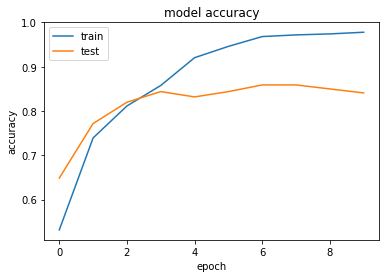

In [ ]:
#summarize history for accuracy

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

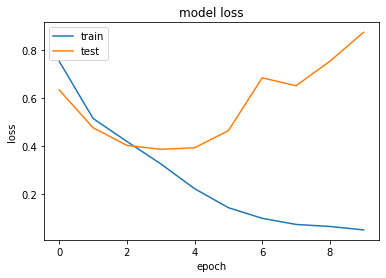

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
# save model
#model.save("model_7layer_0.7578125.h5")
#print("Saved model to disk")

In [ ]:
# load model
#model = load_model('model.h5')

In [ ]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')